# Modeling

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Define-constants" data-toc-modified-id="Define-constants-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Define constants</a></span></li><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Read in data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Model-preparation" data-toc-modified-id="Model-preparation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Model preparation</a></span></li><li><span><a href="#Train,-test-split" data-toc-modified-id="Train,-test-split-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Train, test split</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Evaluation-metric" data-toc-modified-id="Evaluation-metric-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Evaluation metric</a></span></li><li><span><a href="#Baseline-model" data-toc-modified-id="Baseline-model-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Baseline model</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1.7.3"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Ridge-Regularzation" data-toc-modified-id="Ridge-Regularzation-1.7.3.1"><span class="toc-item-num">1.7.3.1&nbsp;&nbsp;</span>Ridge Regularzation</a></span></li><li><span><a href="#Lasso-Regularzation" data-toc-modified-id="Lasso-Regularzation-1.7.3.2"><span class="toc-item-num">1.7.3.2&nbsp;&nbsp;</span>Lasso Regularzation</a></span></li></ul></li><li><span><a href="#KNN" data-toc-modified-id="KNN-1.7.4"><span class="toc-item-num">1.7.4&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Tree-Based-Models" data-toc-modified-id="Tree-Based-Models-1.7.5"><span class="toc-item-num">1.7.5&nbsp;&nbsp;</span>Tree Based Models</a></span><ul class="toc-item"><li><span><a href="#Cart" data-toc-modified-id="Cart-1.7.5.1"><span class="toc-item-num">1.7.5.1&nbsp;&nbsp;</span>Cart</a></span></li><li><span><a href="#Bagged-Tree" data-toc-modified-id="Bagged-Tree-1.7.5.2"><span class="toc-item-num">1.7.5.2&nbsp;&nbsp;</span>Bagged Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.7.5.3"><span class="toc-item-num">1.7.5.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Random-Forest--+-PCA" data-toc-modified-id="Random-Forest--+-PCA-1.7.5.4"><span class="toc-item-num">1.7.5.4&nbsp;&nbsp;</span>Random Forest  + PCA</a></span></li><li><span><a href="#Extra-Trees" data-toc-modified-id="Extra-Trees-1.7.5.5"><span class="toc-item-num">1.7.5.5&nbsp;&nbsp;</span>Extra Trees</a></span></li><li><span><a href="#Ada-Boost" data-toc-modified-id="Ada-Boost-1.7.5.6"><span class="toc-item-num">1.7.5.6&nbsp;&nbsp;</span>Ada Boost</a></span></li></ul></li><li><span><a href="#SVR" data-toc-modified-id="SVR-1.7.6"><span class="toc-item-num">1.7.6&nbsp;&nbsp;</span>SVR</a></span></li><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-1.7.7"><span class="toc-item-num">1.7.7&nbsp;&nbsp;</span>Polynomial Regression</a></span></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-1.7.8"><span class="toc-item-num">1.7.8&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></span></li></ul></li></ul></li></ul></div>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR


from sklearn.metrics import r2_score

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Define constants

In [2]:
RANDOM_STATE = 20200304

In [3]:
LOCATION = 'ny_state'

## Read in data

In [4]:
df = pd.read_csv(f'../data/final_{LOCATION}_agg.csv')

In [5]:
df.head()

,zipcode,total_accounting,total_airport,total_amusement_park,total_art_gallery,total_atm,total_bakery,total_bank,total_bar,total_beauty_salon,...,mean_price_level,mean_rating,mean_user_ratings_total,population,population_density_square_miles,housing_units,price_level*rating,user_ratings_total_per_capita,rating_weighed_population_density,log_home_price_to_income_ratios
0,14870,0,0,0,0,0,2,0,4,0,...,1.333333,4.138235,243.176471,9565,156.0,4311,5.517647,0.025424,645.564706,0.784536
1,11417,0,0,0,0,0,2,0,3,0,...,1.375000,4.165789,341.210526,31927,28529.5,9764,5.727961,0.010687,118847.890789,1.881486
2,10462,0,0,0,0,0,4,0,3,0,...,1.550000,4.000000,451.722222,76756,52066.9,31120,6.200000,0.005885,208267.600000,1.744704
3,14206,0,0,0,0,1,0,0,3,0,...,1.400000,4.093023,156.069767,19869,4100.6,10479,5.730233,0.007855,16783.851163,0.662481
4,12765,0,0,0,0,1,0,0,0,0,...,1.333333,3.671429,38.000000,1095,87.6,419,4.895238,0.034703,321.617143,0.957354


In [6]:
df.shape

(1521, 105)

## Preprocessing

In [7]:
def high_corr_w_dependent_variable(df, dependent_variable, corr_value):
    '''
    Takes df, dependent variable, and value of correlation 
    Returns a df of independant varibles that are highly (e.g. abs(corr) > 0.4) with dependent varible
    '''
    temp_df = df.corr()[[dependent_variable]].sort_values(by=dependent_variable, ascending=False)
    mask_1 = abs(temp_df[dependent_variable]) > corr_value
    return temp_df.loc[mask_1]

In [8]:
high_corr_w_dependent_variable(df, 'log_home_price_to_income_ratios', 0.06)

,log_home_price_to_income_ratios
log_home_price_to_income_ratios,1.000000
total_open_now_True,0.613297
population_density_square_miles,0.588593
rating_weighed_population_density,0.585944
population,0.568489
housing_units,0.564353
total_meal_delivery,0.492924
total_store,0.490759
total_food,0.489080
total_cafe,0.487195


In [9]:
df = df[high_corr_w_dependent_variable(df, 'log_home_price_to_income_ratios', 0.06).index]

In [10]:
df.dropna(inplace=True)

In [11]:
df.drop(columns='zipcode', inplace=True)

## Model preparation

In [12]:
target = 'log_home_price_to_income_ratios'
X = df.drop(columns=target)
y = df[target]

## Train, test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, train_size=0.60)

## Modeling

###  Evaluation metric

I will use R2 as the model evaluation metric.

Define a funciton to display train, test, cross val R2 scores

In [14]:
# Define a funciton to display train, test, cross val R2 scores
def print_results(model, grid_search=True, X=X, y=y, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    if not grid_search:
        print(f'train score: {model.score(X_train, y_train)}')
        print(f'test score: {model.score(X_test, y_test)}')
        print(f'cross val score: {cross_val_score(model, X, y, scoring="r2", cv=4).mean()}')
    else: 
        print(f'best params: {model.best_params_}')
        print(f'train score: {model.score(X_train, y_train)}')
        print(f'test score: {model.score(X_test, y_test)}')
        print(f'cross val score: {cross_val_score(model.best_estimator_, X, y, scoring="r2", cv=4).mean()}')      

Define a function to plot feature importance for tree based models

In [15]:
def plot_feature_importance(model, X=X):
    # Get feature importance, and create a pd dataframe
    feature_importance = pd.DataFrame(dict(zip(X.columns, 
                                               gs_tree.best_estimator_['tree'].feature_importances_)).items())
    # Sorted by feature importance
    feature_importance = feature_importance.sort_values(by=[1])
    
    # Create plot
    plt.figure(figsize=(10, 15))
    ax = plt.barh(y = feature_importance[0], width=feature_importance[1])
    return ax 

### Baseline model

In [16]:
# Create a dummy regressor
dummy_mean = DummyRegressor(strategy='mean', constant=20).fit(X_train, y_train)

In [17]:
print_results(dummy_mean, grid_search=False)

train score: 0.0
test score: -0.005900893742331049
cross val score: -0.0018030575315708397


### Linear Regression

In [18]:
lr = LinearRegression().fit(X_train, y_train)

In [19]:
print_results(lr, grid_search=False)

train score: 0.6333718855498244
test score: 0.6222656814274046
cross val score: 0.6042497695986881


The model is very overfit and has high variance. I will use Ridge and Lasso to regularize the model. 

#### Ridge Regularzation 

In [20]:
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('ridge', Ridge())
])

params = {
   'ridge__alpha' : [0.01, 1, 10, 100, 200, 400],
}

gs_ridge = GridSearchCV(
    pipe,
    params,
    cv=4
).fit(X_train, y_train);

In [21]:
print_results(gs_ridge)

best params: {'ridge__alpha': 100}
train score: 0.6205648520153839
test score: 0.6187602483544328
cross val score: 0.6042389206594483


#### Lasso Regularzation

In [22]:
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('lasso', Lasso())
])

params = {
   'lasso__alpha' : [0.01, 0.02, 1, 2, 3, 10],
}

gs_lasso = GridSearchCV(
    pipe,
    params,
    cv=4
).fit(X_train, y_train);

In [23]:
print_results(gs_lasso)

best params: {'lasso__alpha': 0.01}
train score: 0.6111710128032091
test score: 0.6143516498084047
cross val score: 0.6037948365233011


### KNN

In [24]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

pipe_params = {
    'knn__n_neighbors': [9, 10],
    'knn__p' : [1, 2],
    'knn__weights' : ['uniform', 'distance'],
    'knn__leaf_size' : [30, 40]
}

gs_knn = GridSearchCV(
    pipe,
    pipe_params,
    cv=4
).fit(X_train, y_train);

In [25]:
print_results(gs_knn)

best params: {'knn__leaf_size': 30, 'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}
train score: 1.0
test score: 0.5476377740791197
cross val score: 0.5532384313769003


### Tree Based Models

#### Cart

In [26]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('tree', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

params = {
    'tree__max_depth' : [10, 15, 20, 30],
    'tree__min_samples_leaf' : [2, 3, 5],
    'tree__max_features' : [4, 6, 10]
}

gs_tree = GridSearchCV(
    pipe,
    params,
    cv=4
).fit(X_train, y_train);

In [27]:
print_results(gs_tree)

best params: {'tree__max_depth': 15, 'tree__max_features': 6, 'tree__min_samples_leaf': 5}
train score: 0.7361929224407509
test score: 0.519692680826702
cross val score: 0.439011772458464


<BarContainer object of 48 artists>

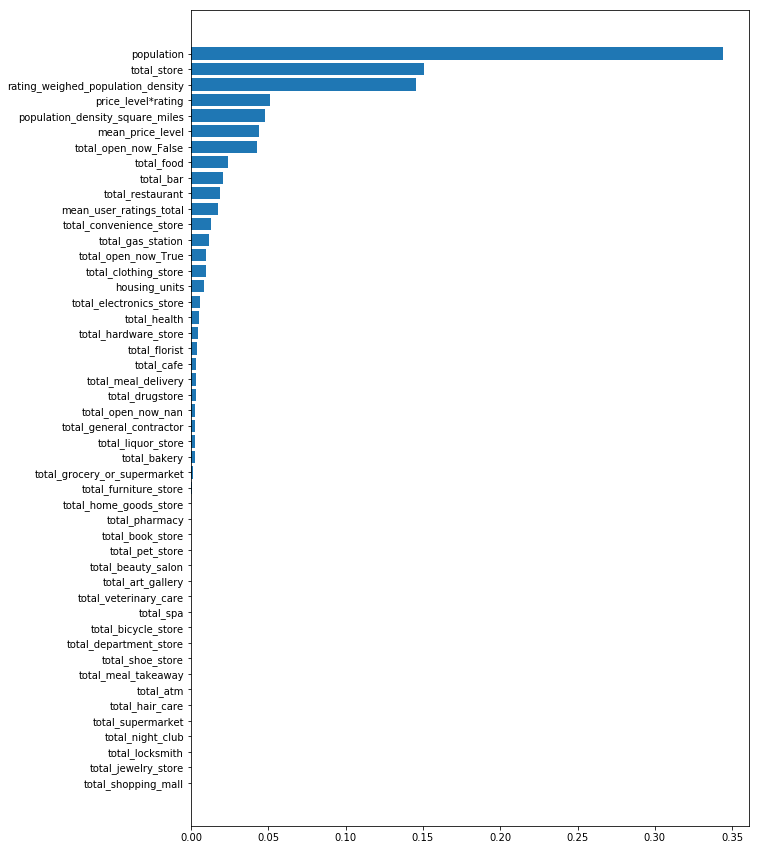

In [28]:
plot_feature_importance(gs_tree)

#### Bagged Tree

In [29]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('bag', BaggingRegressor(random_state=RANDOM_STATE))
])

params = {
    'bag__n_estimators' : [8, 10, 12, 14],
    'bag__max_samples' : [0.5, 0.7, 1],
    'bag__max_features' : [0.5, 0.7, 1]
}

gs_bag = GridSearchCV(
    pipe,
    params,
    cv=4
).fit(X_train, y_train);

In [30]:
print_results(gs_bag)

best params: {'bag__max_features': 0.7, 'bag__max_samples': 0.7, 'bag__n_estimators': 14}
train score: 0.8957872922412935
test score: 0.6663364001269694
cross val score: 0.6577715250560725


#### Random Forest

In [31]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('forest', RandomForestRegressor(random_state=RANDOM_STATE))
])

params = {
    'forest__max_depth' : [10, 15, 20, 30],
    'forest__min_samples_leaf' : [2, 3, 5],
    'forest__max_features' : [4, 6, 10],
    'forest__min_impurity_decrease' : [0.0, 0.1]
}

gs_forest = GridSearchCV(
    pipe,
    params,
    cv=4
).fit(X_train, y_train);

In [32]:
print_results(gs_forest)

best params: {'forest__max_depth': 20, 'forest__max_features': 10, 'forest__min_impurity_decrease': 0.0, 'forest__min_samples_leaf': 3}
train score: 0.8519608762760694
test score: 0.6508070697904926
cross val score: 0.6448222713826147


####  Random Forest  + PCA

In [33]:
# Use a pipeline to combine StandardScaler and KNN
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('pca', PCA()),
    ('forest', RandomForestRegressor(random_state=RANDOM_STATE))
])

params = {
    'pca__n_components': [10, 15, 20],
    'forest__max_depth' : [10, 15, 20, 30],
    'forest__min_samples_leaf' : [2, 3, 5],
    'forest__max_features' : [5, 7, 10],
    'forest__min_impurity_decrease' : [0.0, 0.1]
}

gs_forest_pca = GridSearchCV(
    pipe,
    params,
    cv=4
).fit(X_train, y_train);

In [34]:
print_results(gs_forest_pca)

best params: {'forest__max_depth': 10, 'forest__max_features': 5, 'forest__min_impurity_decrease': 0.0, 'forest__min_samples_leaf': 3, 'pca__n_components': 10}
train score: 0.7889424770467642
test score: 0.549050785136227
cross val score: 0.5653882644492447


<BarContainer object of 48 artists>

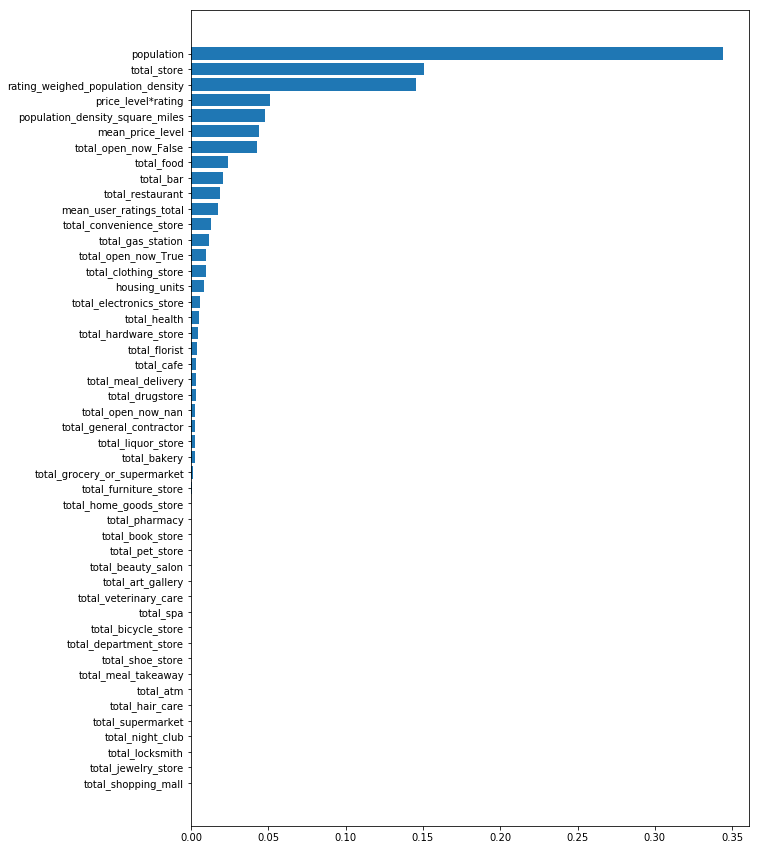

In [35]:
plot_feature_importance(gs_forest_pca)

#### Extra Trees 

In [36]:
# Use a pipeline to combine StandardScaler and KNN
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('extra', ExtraTreesRegressor(random_state=RANDOM_STATE))
])

params = {
    'extra__max_depth' : [10, 15, 20, 30],
    'extra__min_samples_leaf' : [2, 3, 5],
    'extra__max_features' : [4, 6, 10],
    'extra__min_impurity_decrease' : [0.0, 0.1]
}

gs_extra = GridSearchCV(
    pipe,
    params,
    cv=4
).fit(X_train, y_train);

In [37]:
print_results(gs_extra)

best params: {'extra__max_depth': 20, 'extra__max_features': 10, 'extra__min_impurity_decrease': 0.0, 'extra__min_samples_leaf': 3}
train score: 0.8509386220323106
test score: 0.6308759256999774
cross val score: 0.613521209436075


#### Ada Boost

In [38]:
# Use a pipeline to combine StandardScaler and KNN
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('ada', AdaBoostRegressor(random_state=RANDOM_STATE))
])

params = {
    'ada__learning_rate' : [0.5, 1.0, 1.2],
    'ada__loss' : ['linear', 'square', 'exponential']
}

gs_ada = GridSearchCV(
    pipe,
    params,
    cv=4
).fit(X_train, y_train);

In [39]:
print_results(gs_ada)

best params: {'ada__learning_rate': 1.2, 'ada__loss': 'square'}
train score: 0.6925792953798757
test score: 0.591566381750061
cross val score: 0.5366821288140073


### SVR

In [40]:
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('svr', SVR())
])

params = {
    'svr__gamma' : ['scale'],
    'svr__degree' : [2, 3, 4],
    'svr__kernel' : ['linear', 'poly', 'rbf']
}

gs_svr = GridSearchCV(
    pipe,
    params,
    cv=5
).fit(X_train, y_train);

In [41]:
print_results(gs_svr)

best params: {'svr__degree': 2, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
train score: 0.6199919581127235
test score: 0.619310105821471
cross val score: 0.6040970396424383


### Polynomial Regression

In [42]:
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('lr', LinearRegression())
])

params = {
    'poly_features__degree': [1, 2, 3],
}

gs_poly = GridSearchCV(
    pipe,
    params,
    cv=5
).fit(X_train, y_train);

In [43]:
print_results(gs_poly)

best params: {'poly_features__degree': 1}
train score: 0.6333718855498245
test score: 0.622265681427405
cross val score: 0.6042497695986876


### Stochastic Gradient Descent

In [44]:
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('SGD', SGDRegressor())
])

params = {
    'SGD__max_iter': [1000],
    'SGD__penalty' : ['l1', 'l2'],
    'SGD__tol': [1e-3]
}

gs_sgd = GridSearchCV(
    pipe,
    params,
    cv=5
    
).fit(X_train, y_train);

In [45]:
print_results(gs_sgd)

best params: {'SGD__max_iter': 1000, 'SGD__penalty': 'l1', 'SGD__tol': 0.001}
train score: 0.6240878730688023
test score: 0.6233022355259134
cross val score: 0.6028644106061916
